In [1]:
#기본 설정
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

plt.style.use("seaborn")
sns.set(font_scale=2.5)

import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

In [2]:
#STEP1: 데이터셋 확인 
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

train.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [9]:
##1-1. null data check
for col in train.columns:
    msg = "column: {:10}\t Percent of NaN value: {:.2f}%" .format(col, 100*(train[col].isnull().sum() / train[col].shape[0]))
    print(msg)

column: PassengerId	 Percent of NaN value: 0.00%
column: Survived  	 Percent of NaN value: 0.00%
column: Pclass    	 Percent of NaN value: 0.00%
column: Name      	 Percent of NaN value: 0.00%
column: Sex       	 Percent of NaN value: 0.00%
column: Age       	 Percent of NaN value: 19.87%
column: SibSp     	 Percent of NaN value: 0.00%
column: Parch     	 Percent of NaN value: 0.00%
column: Ticket    	 Percent of NaN value: 0.00%
column: Fare      	 Percent of NaN value: 0.00%
column: Cabin     	 Percent of NaN value: 77.10%
column: Embarked  	 Percent of NaN value: 0.22%


In [10]:
for col in test.columns:
    msg = "column: {:10}\t Percent of NaN value: {:.2f}%" .format(col, 100*(test[col].isnull().sum() / test[col].shape[0]))
    print(msg)

column: PassengerId	 Percent of NaN value: 0.00%
column: Pclass    	 Percent of NaN value: 0.00%
column: Name      	 Percent of NaN value: 0.00%
column: Sex       	 Percent of NaN value: 0.00%
column: Age       	 Percent of NaN value: 20.57%
column: SibSp     	 Percent of NaN value: 0.00%
column: Parch     	 Percent of NaN value: 0.00%
column: Ticket    	 Percent of NaN value: 0.00%
column: Fare      	 Percent of NaN value: 0.24%
column: Cabin     	 Percent of NaN value: 78.23%
column: Embarked  	 Percent of NaN value: 0.00%


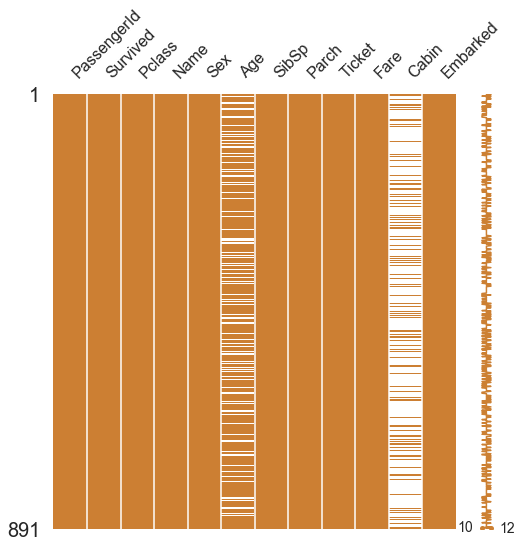

In [14]:
msno.matrix(df=train.iloc[:,:], figsize=(8,8), color = (0.8,0.5,0.2))

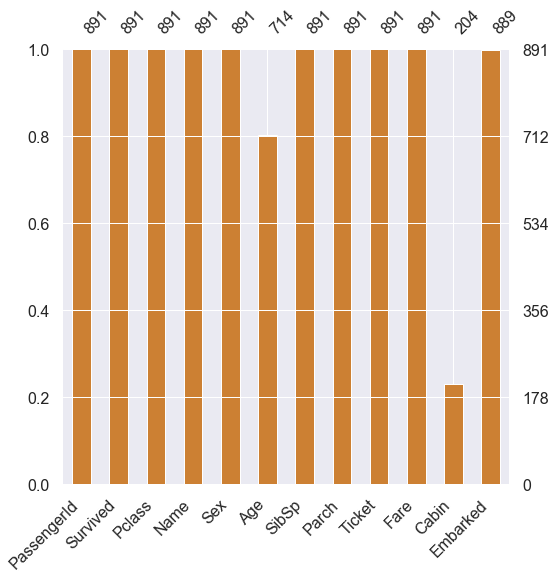

In [15]:
msno.bar(df=train.iloc[:,:], figsize=(8,8), color=(0.8,0.5, 0.2))

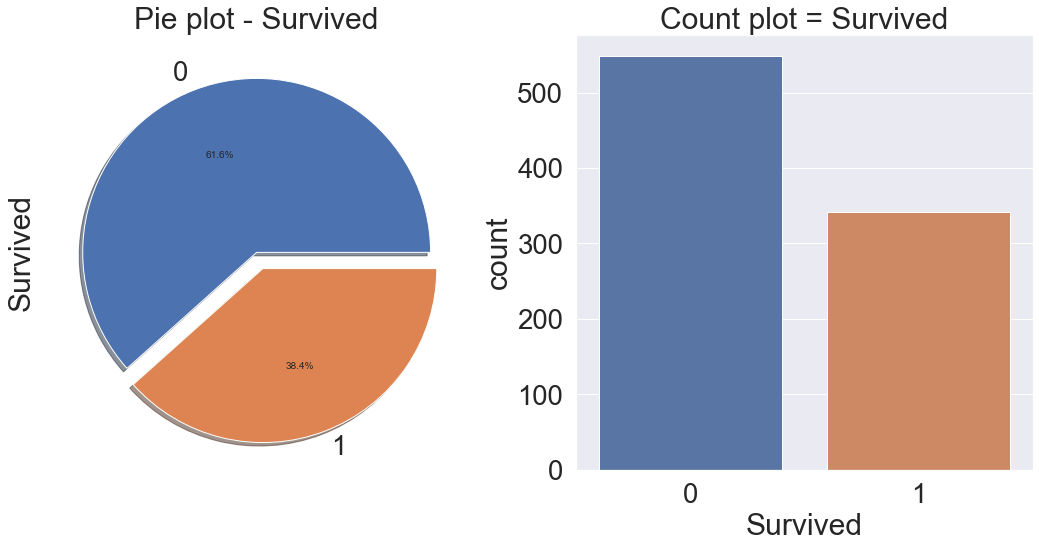

In [20]:
##1-2.Target Label 확인

fig, ax = plt.subplots(1,2, figsize=(18,8))

train["Survived"].value_counts().plot.pie(explode = [0, 0.1], autopct = "%1.1f%%", ax=ax[0],shadow=True) #explode: 몇번째 label의 파이가 돌출되는 크기
#autopct: 파이조각의 전체대비 백분율
ax[0].set_title("Pie plot - Survived")
sns.countplot("Survived", data = train, ax=ax[1])
ax[1].set_title("Count plot = Survived")

plt.show()

In [21]:
#=> 이정도면 targetlabel이 balanced됨을 볼 수 있음

In [22]:
#STEP2: EDA => 숨겨진 사실 찾기 위해 적절한 시각화 필요
##등급별로 큰 차이가 날것 같다는 생각
##2-1 Pclass
train[["Pclass","Survived"]].groupby("Pclass").count()

,Survived
Pclass,
1,216
2,184
3,491


In [24]:
pd.crosstab(train["Pclass"], train["Survived"], margins=True).style.background_gradient(cmap="summer_r")

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


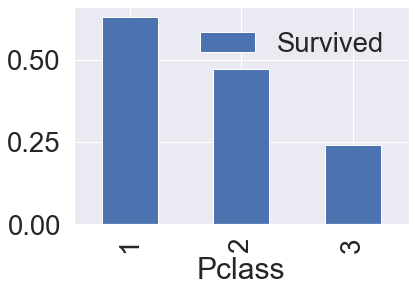

In [27]:
train[["Pclass","Survived"]].groupby("Pclass").mean().sort_values(by="Survived", ascending=False).plot.bar()

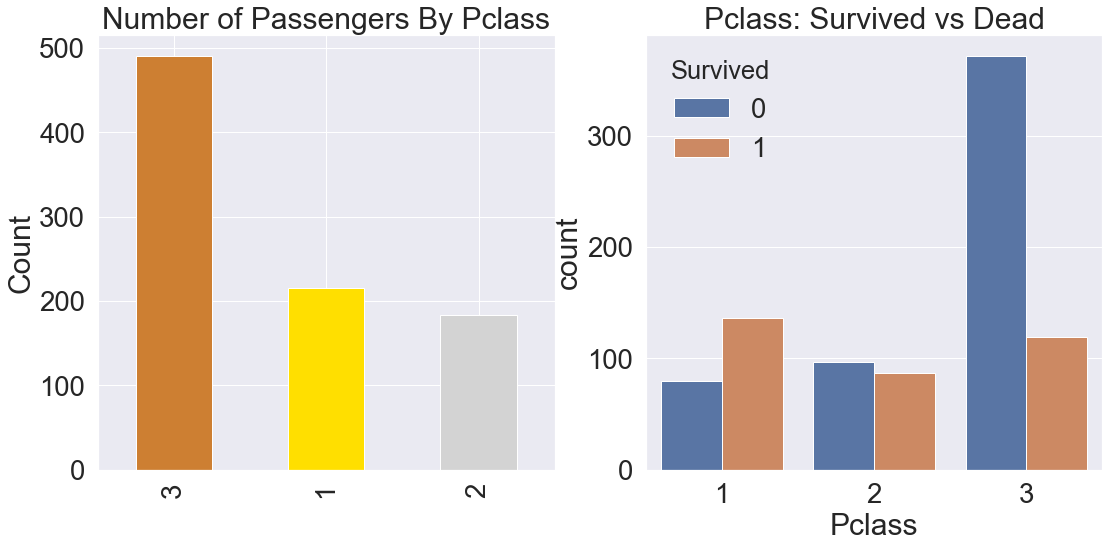

In [30]:
#sns 통해서 더 자세히 보기
fig, ax = plt.subplots(1,2, figsize=(18,8))
train["Pclass"].value_counts().plot.bar(color=["#CD7F32","#FFDF00","#D3D3D3"], ax=ax[0])
ax[0].set_title("Number of Passengers By Pclass")
ax[0].set_ylabel("Count")

sns.countplot("Pclass", hue="Survived", data=train, ax=ax[1])
ax[1].set_title("Pclass: Survived vs Dead")
plt.show()

In [31]:
##Pclass:승선 등급이 높을 수록 생존율이 높음을 볼 수 있음

Text(0.5, 1.0, 'Sex: Survived vs Dead')

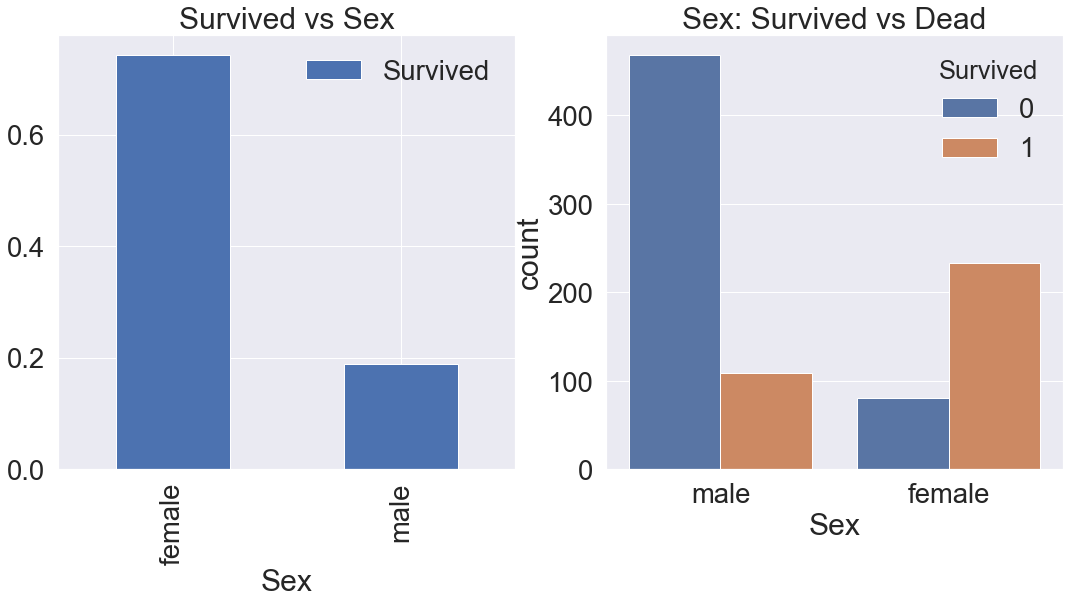

In [41]:
##2-2 Sex

fig, ax = plt.subplots(1,2, figsize=(18,8))
train[["Sex","Survived"]].groupby("Sex").mean().plot.bar(ax=ax[0])
ax[0].set_title("Survived vs Sex")

sns.countplot("Sex", hue="Survived", data=train, ax=ax[1])
ax[1].set_title("Sex: Survived vs Dead")

In [42]:
train[["Sex","Survived"]].groupby("Sex").mean()

,Survived
Sex,
female,0.742038
male,0.188908


In [43]:
pd.crosstab(train["Sex"], train["Survived"], margins=True).style.background_gradient(cmap="summer_r")

Survived,0,1,All
Sex,,,
female,81,233,314
male,468,109,577
All,549,342,891


In [44]:
#Sex:여성이 남성보다 생존율이 높음을 볼 수 있음

In [45]:
##2-3: Both Sex and Pclass

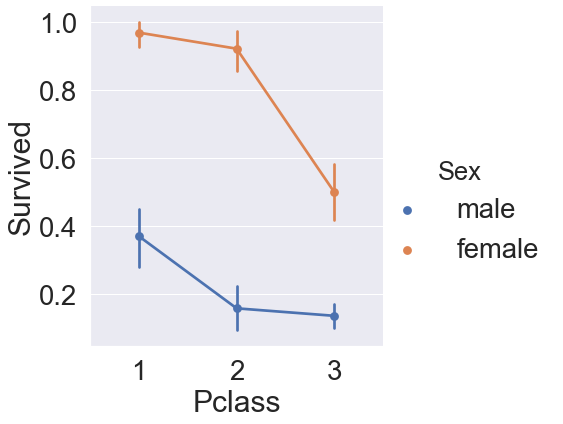

In [46]:
sns.factorplot("Pclass","Survived", hue='Sex', data=train, size=6)

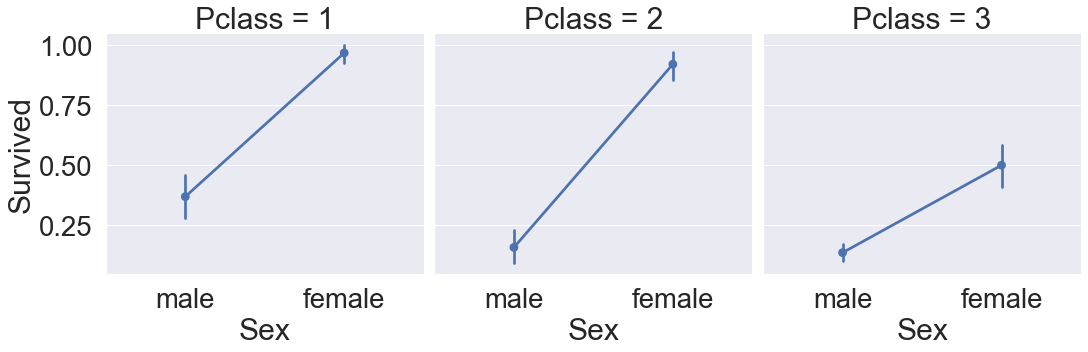

In [47]:
sns.factorplot(x="Sex", y="Survived", col="Pclass", data=train)

In [50]:
#2-4:Age
print("제일 나이 많은 탑승객 %.1f Years" % train["Age"].max())
print("제일 어린 탑승객 : %.1f Years" % train["Age"].min())
print("탑승객 평균 나이 : %.1f Years" % train["Age"].mean())

제일 나이 많은 탑승객 80.0 Years
제일 어린 탑승객 : 0.4 Years
탑승객 평균 나이 : 29.7 Years


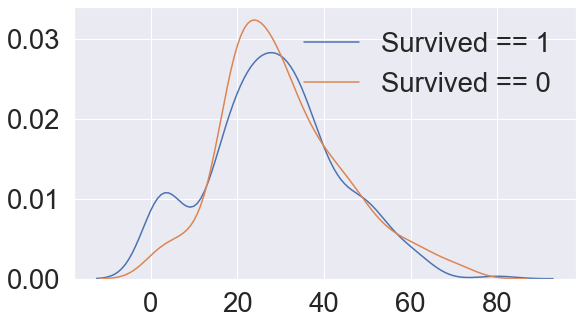

In [52]:
fig, ax = plt.subplots(1,1,figsize=(9,5))
sns.kdeplot(train[train["Survived"] == 1]["Age"], ax=ax)
sns.kdeplot(train[train["Survived"] == 0]["Age"], ax=ax)
plt.legend(["Survived == 1", "Survived == 0"])
plt.show()

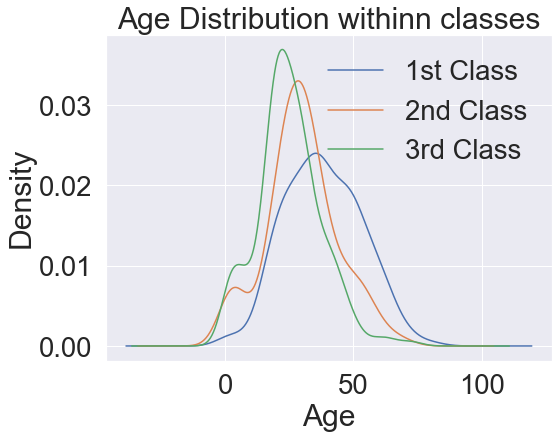

In [53]:
plt.figure(figsize=(8,6))
train["Age"][train["Pclass"] == 1].plot(kind = "kde")
train["Age"][train["Pclass"] == 2].plot(kind ='kde')
train["Age"][train["Pclass"] == 3].plot(kind = "kde")

plt.xlabel("Age")
plt.title("Age Distribution withinn classes")
plt.legend(["1st Class", "2nd Class", "3rd Class"])

In [54]:
#Class가 높을 수록 나이가 많은 경향이 있음
#=> 나이 변화에 따른 생존율 추이 지켜보기

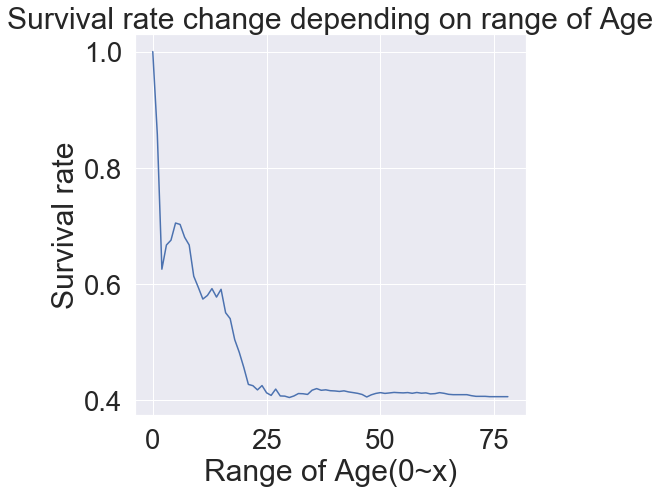

In [57]:
cummulate_survival_ratio = []
for i in range(1, 80):
    cummulate_survival_ratio.append(train[train["Age"] < i]["Survived"].sum() / len(train[train["Age"] < i]["Survived"]))

plt.figure(figsize=((7,7)))
plt.plot(cummulate_survival_ratio)
plt.title("Survival rate change depending on range of Age")
plt.ylabel("Survival rate")
plt.xlabel("Range of Age(0~x)")
plt.show()

In [58]:
#나이가 어릴수록 생존률이 높음을 볼 수 있음 
#=> 나이가 생존율에 중요한 feature임을 알 수 있다

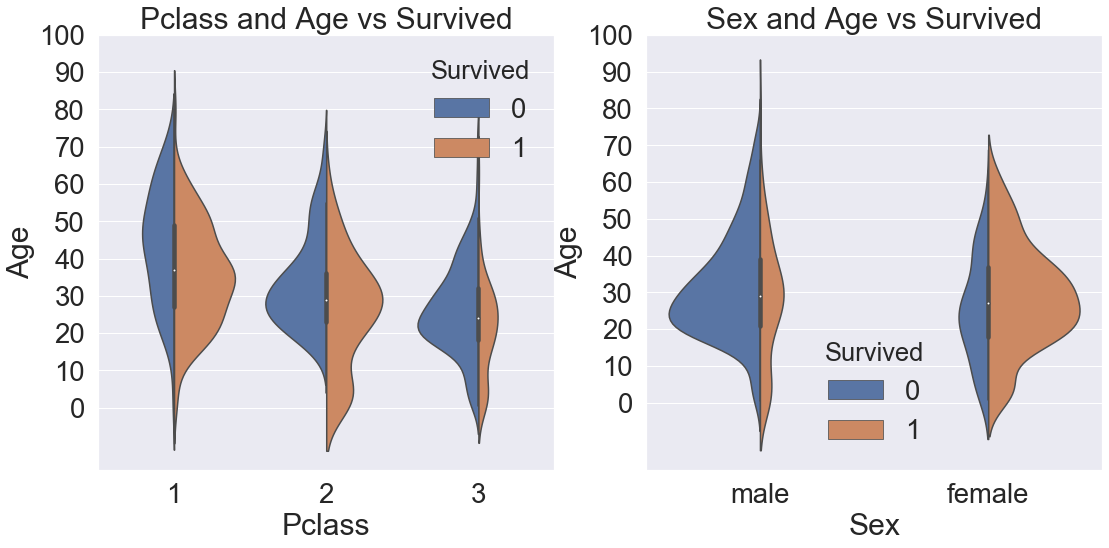

In [60]:
#2-5: Pclass, Sex, Age
##Violinplot으로 그려보기

fig, ax = plt.subplots(1,2, figsize=(18,8))
sns.violinplot("Pclass", "Age", hue="Survived", data=train, scale="count", split=True, ax=ax[0])
ax[0].set_title("Pclass and Age vs Survived")
ax[0].set_yticks(range(0,110,10))
sns.violinplot("Sex","Age", hue="Survived", data=train, scale="count", split=True, ax=ax[1])
ax[1].set_title("Sex and Age vs Survived")
ax[1].set_yticks(range(0,110,10))
plt.show()

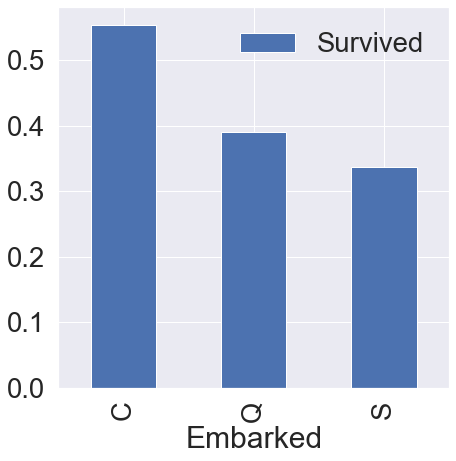

In [64]:
#2-6: Embarked 탑승한 항구 탐색해보기
fig, ax = plt.subplots(1, 1, figsize=(7,7))
train[["Embarked", "Survived"]].groupby("Embarked").mean().sort_values(by="Survived", ascending=False).plot.bar(ax=ax)

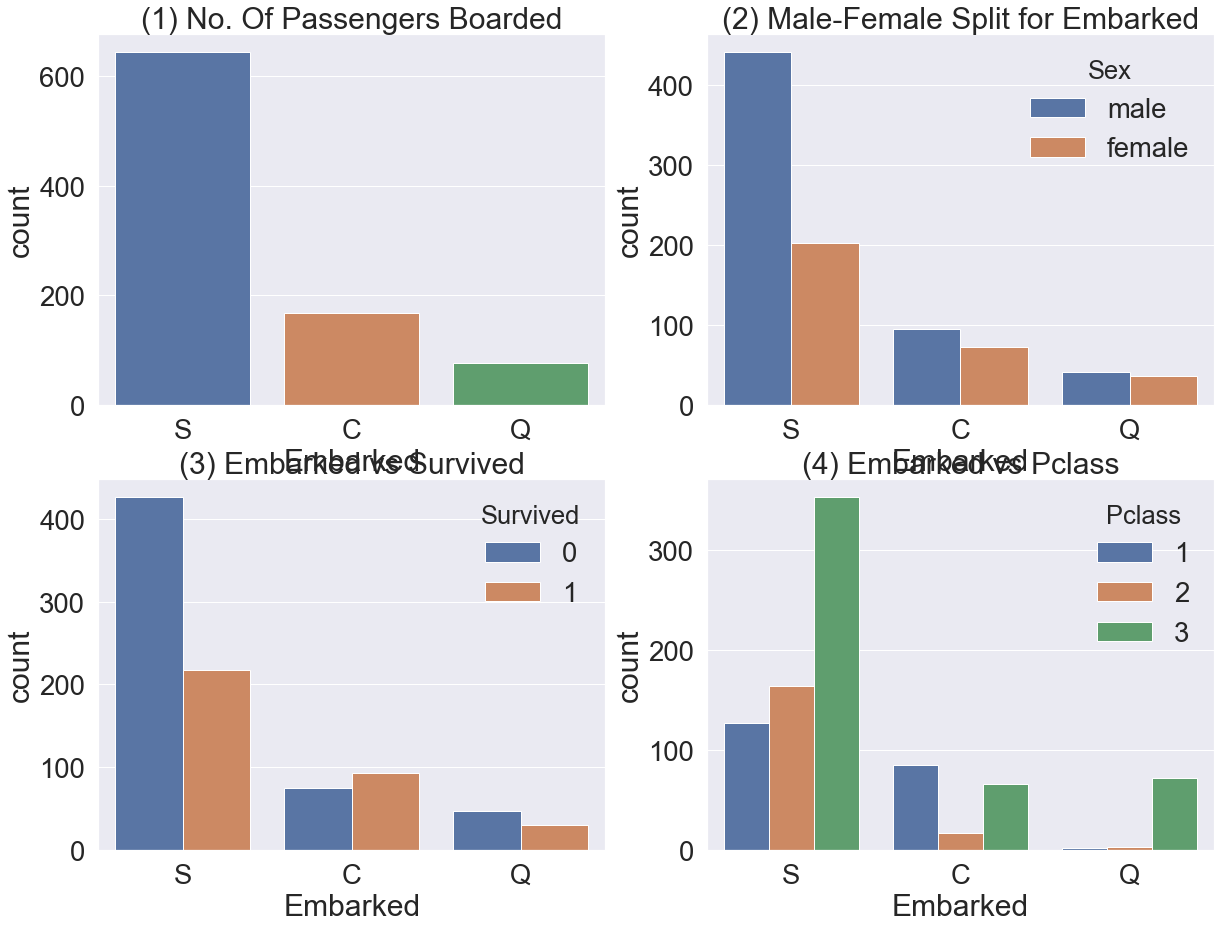

In [72]:
fig, ax = plt.subplots(2,2, figsize=(20,15))
sns.countplot("Embarked", data=train,ax=ax[0,0])
ax[0,0].set_title("(1) No. Of Passengers Boarded")
sns.countplot("Embarked", hue="Sex", data=train, ax=ax[0,1])
ax[0,1].set_title("(2) Male-Female Split for Embarked")

sns.countplot("Embarked", hue="Survived", data=train, ax=ax[1,0])
ax[1,0].set_title("(3) Embarked vs Survived")
sns.countplot("Embarked", hue="Pclass", data=train, ax=ax[1,1])
ax[1,1].set_title("(4) Embarked vs Pclass")
plt.show()

In [114]:
#2-7 Family내용 보기 Sibsp+Parch
train["FamilySize"] = train["SibSp"] + train["Parch"] + 1 #자기자신까지
test["FamilySize"] = test["SibSp"] + test["Parch"]


print("Maximum size of Family: ", train["FamilySize"].max())
print("Minimum size of Family:", train["FamilySize"].min())

Maximum size of Family:  11
Minimum size of Family: 1


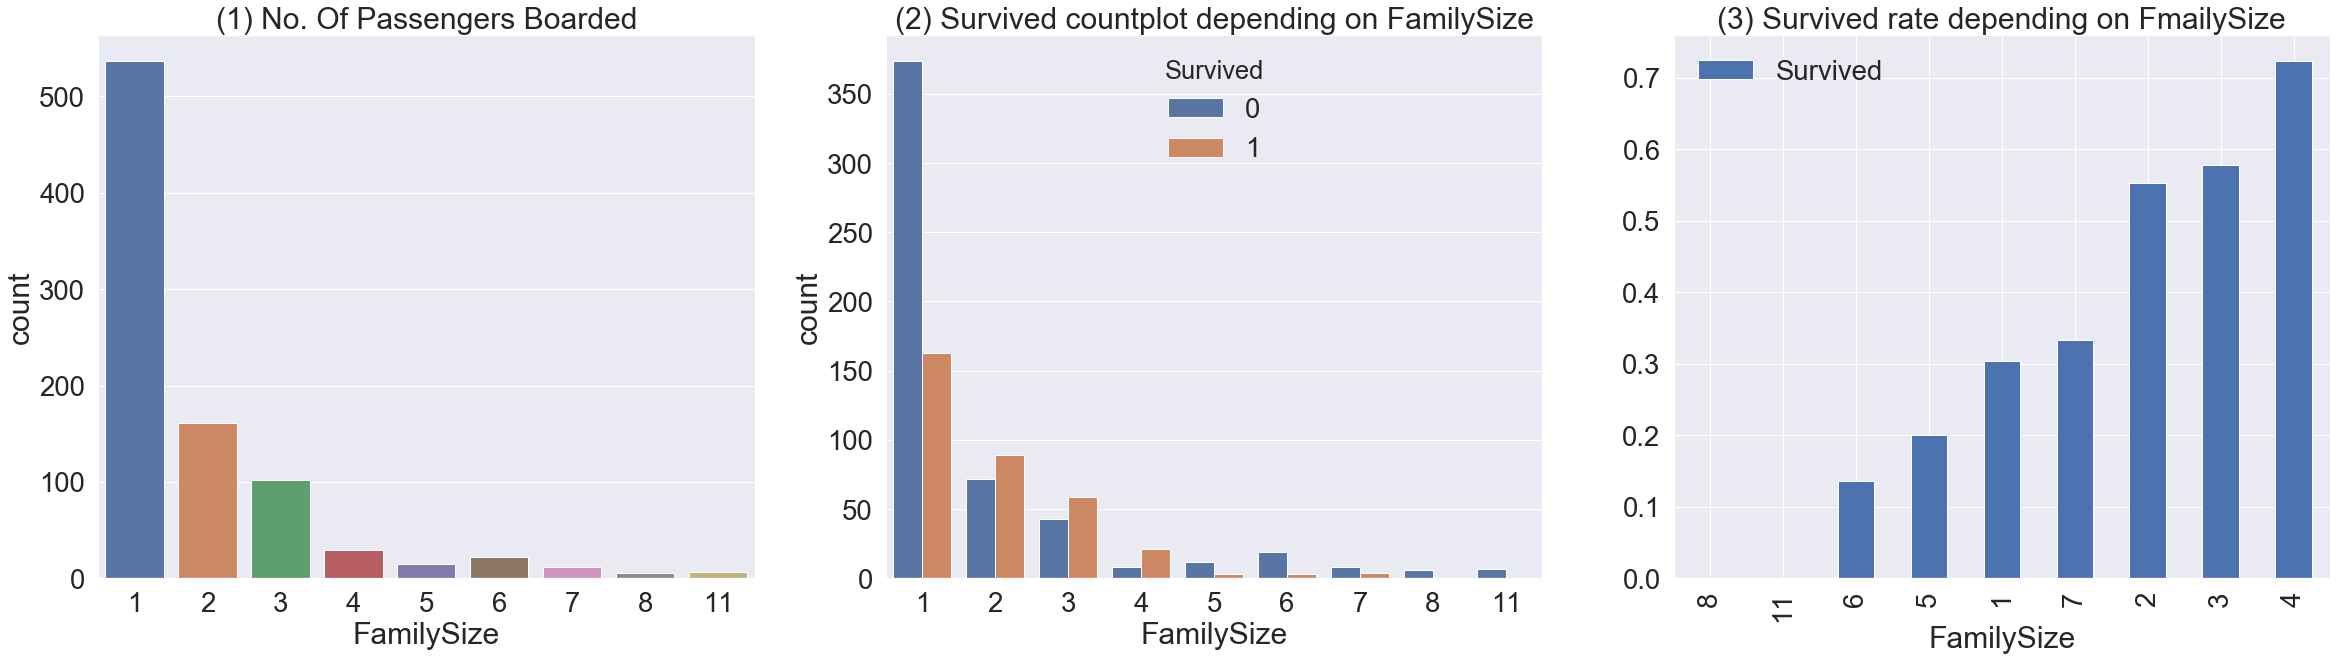

In [76]:
fig, ax = plt.subplots(1,3, figsize=(40,10))
sns.countplot("FamilySize", data=train, ax=ax[0])
ax[0].set_title("(1) No. Of Passengers Boarded")

sns.countplot("FamilySize", hue="Survived", data=train, ax=ax[1])
ax[1].set_title("(2) Survived countplot depending on FamilySize")

train[["FamilySize", "Survived"]].groupby("FamilySize").mean().sort_values(by="Survived").plot.bar(ax=ax[2])
ax[2].set_title("(3) Survived rate depending on FmailySize")

plt.show()

In [ ]:
#3~4명 사이에서 생존확률이 제일 높음을 알 수 있다:)

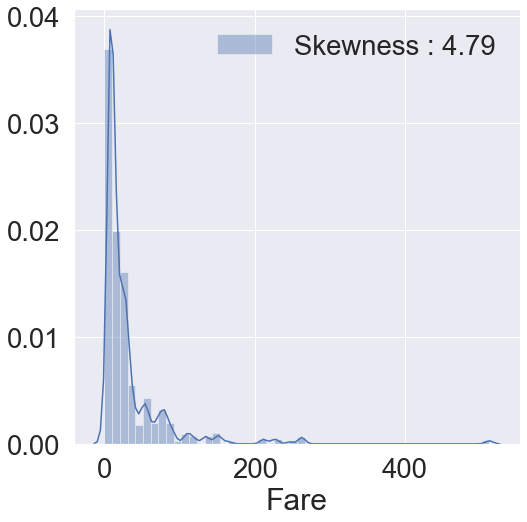

In [77]:
#2-8:Fare 
fig, ax = plt.subplots(1,1,figsize=(8,8))
g = sns.distplot(train["Fare"], color="b", label="Skewness : %.2f" % (train["Fare"].skew()), ax=ax)
g = g.legend(loc="best")

In [79]:
#skewness가 강함을 볼 수 있어서
#outlier에 강하게 영향을 받아서 log등 transform 변환을 시켜줘야함

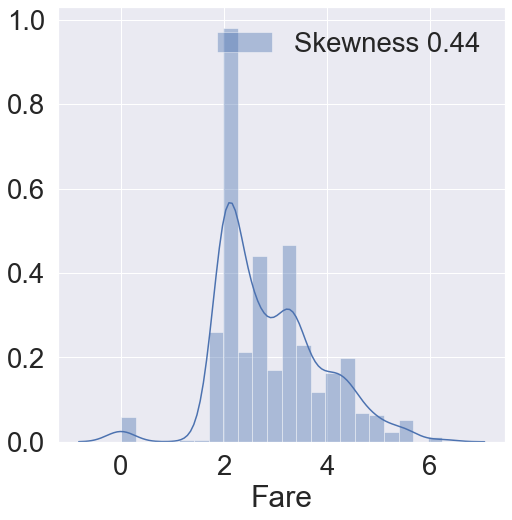

In [80]:
test.loc[test.Fare.isnull(),"Fare"] = test["Fare"].mean() #결측값 평균값으로 치환하기

train["Fare"]  = train["Fare"].map(lambda i: np.log(i) if i > 0 else 0)
test["Fare"] = test["Fare"].map(lambda i: np.log(i) if i > 0 else 0)


fig, ax = plt.subplots(1,1, figsize=(8,8))
g = sns.distplot(train["Fare"], color="b", label="Skewness %.2f" % (train["Fare"].skew()), ax=ax)
g = g.legend(loc="best")

In [81]:
#비대칭성이 많이 사라짐:)
#이런식의 변환을 통해서 feature engineering정도:)

In [82]:
#2-9:Cabin => 80%가 NaN이라서 중요한 정보를 얻기가 쉽지 않음
#포함하지 않음

In [48]:
len(train["Ticket"].unique())
train["Ticket"].value_counts()

347082      7
1601        7
CA. 2343    7
CA 2144     6
3101295     6
           ..
236853      1
3474        1
347060      1
PC 17474    1
A/5 3536    1
Name: Ticket, Length: 681, dtype: int64

In [54]:
train[train["Ticket"] == "CA. 2343"]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
159,160,0,3,"Sage, Master. Thomas Henry",male,NaN,8,2,CA. 2343,69.55,NaN,S
180,181,0,3,"Sage, Miss. Constance Gladys",female,NaN,8,2,CA. 2343,69.55,NaN,S
201,202,0,3,"Sage, Mr. Frederick",male,NaN,8,2,CA. 2343,69.55,NaN,S
324,325,0,3,"Sage, Mr. George John Jr",male,NaN,8,2,CA. 2343,69.55,NaN,S
792,793,0,3,"Sage, Miss. Stella Anna",female,NaN,8,2,CA. 2343,69.55,NaN,S
846,847,0,3,"Sage, Mr. Douglas Bullen",male,NaN,8,2,CA. 2343,69.55,NaN,S
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.55,NaN,S


In [78]:
##3 결측값 제거

PassengerId    False
Survived       False
Pclass         False
Name           False
Sex            False
Age             True
SibSp          False
Parch          False
Ticket         False
Fare           False
Cabin           True
Embarked        True
dtype: bool

In [86]:
#Age의 결측값 제거
print(train.Age.isnull().sum()) #177개의 결측값이 있음을 볼 수 있음
                                #이름 통해서 나이 예측해보기
                                #title과 statistics이용하기

177


In [91]:
train["Initial"] = train.Name.str.extract("([A-Za-z]+)\.")
test["Initial"]  = test.Name.str.extract("([A-Za-z]+)\.")

In [98]:
pd.crosstab(train["Initial"],train["Sex"]).T.style.background_gradient(cmap="summer_r")

Initial,Capt,Col,Countess,Don,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir
Sex,,,,,,,,,,,,,,,,,
female,0,0,1,0,1,0,1,0,0,182,2,1,0,125,1,0,0
male,1,2,0,1,6,1,0,2,40,0,0,0,517,0,0,6,1


In [100]:
#많이 쓰는 호칭으로 replace하기
train["Initial"].replace(["Mlle","Mme","Ms","Dr","Major","Lady","Countess","Jonkheer","Col","Rev","Capt","Sir","Don","Dona"], 
                        ["Miss", "Miss","Miss","Mr","Mr","Mrs","Mrs","Other","Other","Other","Mr","Mr","Mr","Mr"], inplace=True)
test["Initial"].replace(["Mlle","Mme","Ms","Dr","Major","Lady","Countess","Jonkheer","Col","Rev","Capt","Sir","Don","Dona"], 
                        ["Miss", "Miss","Miss","Mr","Mr","Mrs","Mrs","Other","Other","Other","Mr","Mr","Mr","Mr"], inplace=True)

In [101]:
train.groupby("Initial").mean()  #호칭별로 생존율이 크게 다름을 볼 수 있다

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
Initial,,,,,,,
Master,414.975000,0.575000,2.625000,4.574167,2.300000,1.375000,34.703125
Miss,411.741935,0.704301,2.284946,21.860000,0.698925,0.537634,43.937188
Mr,455.880907,0.162571,2.381853,32.739609,0.293006,0.151229,24.939822
Mrs,456.393701,0.795276,1.984252,35.981818,0.692913,0.818898,45.420603
Other,564.444444,0.111111,1.666667,45.888889,0.111111,0.111111,19.102778


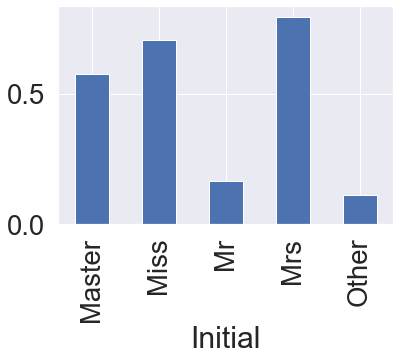

In [102]:
train.groupby("Initial")["Survived"].mean().plot.bar()

In [103]:
#호칭과 age의 평균을 이용해서 결측값 채우기
train.loc[(train.Age.isnull() & train.Initial == "Mr"), "Age"] = 33
train.loc[(train.Age.isnull() & train.Initial == "Mrs"), "Age"] = 36
train.loc[(train.Age.isnull() & train.Initial == "Master"), "Age"] = 25
train.loc[(train.Age.isnull() & train.Initial == "Miss"), "Age"] = 22
train.loc[(train.Age.isnull() & train.Initial == "Other"), "Age"] = 46


test.loc[(test.Age.isnull() & test.Initial == "Mr"), "Age"] = 33
test.loc[(test.Age.isnull() & test.Initial == "Mrs"), "Age"] = 36
test.loc[(test.Age.isnull() & test.Initial == "Master"), "Age"] = 25
test.loc[(test.Age.isnull() & test.Initial == "Miss"), "Age"] = 22
test.loc[(test.Age.isnull() & test.Initial == "Other"), "Age"] = 46


In [105]:
#3-1-2 Embarked 결측치 채우기
print("Embarked has", train["Embarked"].isnull().sum(), "Null values")

Embarked has 2 Null values


In [110]:
#결측치가 별로 없으니까 최빈값으로 채우기
train["Embarked"].mode()
train["Embarked"].fillna("S", inplace=True)

In [111]:
#3-2 Age 변수를 범주화해주기 : information loss가 있을 수 있지만 배우는 입장이니까! / 10살 간격

def category_age(x):
    if x < 10:
        return 0
    elif x < 20:
        return 1
    elif x < 30 :
        return 2
    elif x < 40:
        return 3
    elif x <50:
        return 4
    elif x <60:
        return 5
    elif x < 70:
        return 6
    else :
        return 7
    
train["Age_cat"] = train["Age"].apply(category_age)
test["Age_cat"] = test["Age"].apply(category_age)

train.drop("Age",axis=1, inplace=True)
test.drop("Age", axis=1, inplace=True)

In [120]:
train.drop(["Ticket","SibSp","Parch"], axis=1, inplace=True)

In [123]:
#3-3 Change Initial, Embarked and Sex
train["Initial"] = train["Initial"].map({"Master":0, "Miss":1, "Mr":2, "Mrs":3, "Other":4})
test["Initial"] = test["Initial"].map({"Master":0, "Miss":1, "Mr":2, "Mrs":3, "Other":4})

In [125]:
train["Embarked"].value_counts()

S    646
C    168
Q     77
Name: Embarked, dtype: int64

In [126]:
train["Embarked"] = train["Embarked"].map({"C":0, "Q":1, "S":2})
test["Embarked"] = test["Embarked"].map({"C":0, "Q":1, "S":2})

In [129]:
train["Sex"] = train["Sex"].map({"female":0, "male":1})
test["Sex"] = test["Sex"].map({"female":0, "male":1})

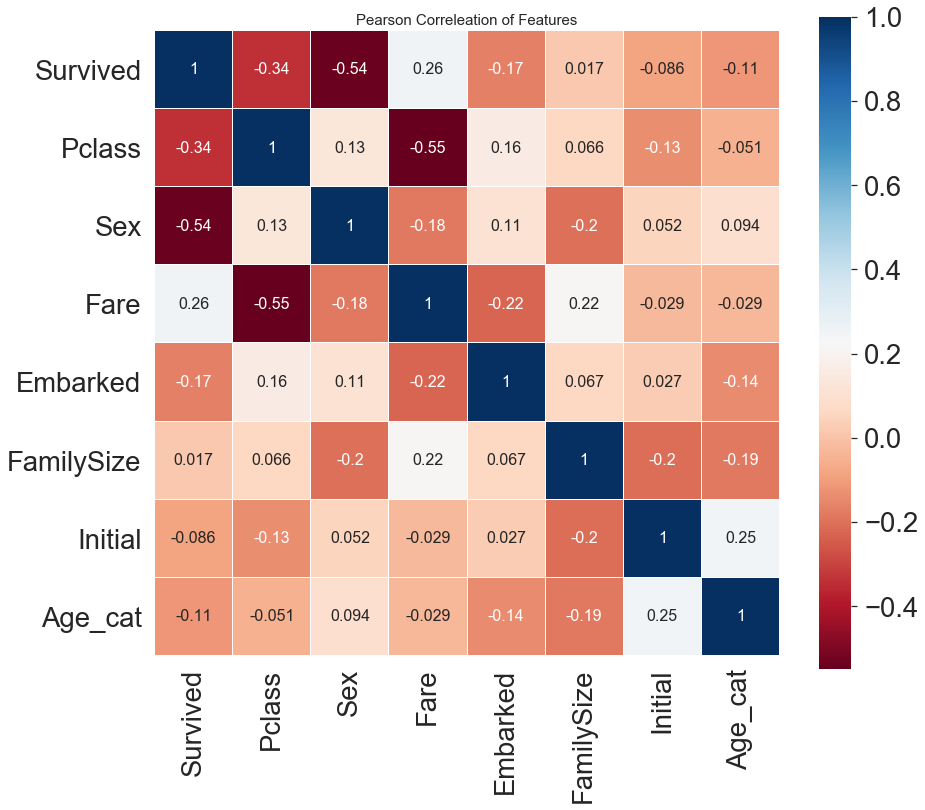

In [140]:
##상관관계 파악하기
heatmap_data = train[["Survived", "Pclass", "Sex", "Fare", "Embarked", "FamilySize","Initial", "Age_cat"]]

colormap = plt.cm.RdBu
plt.figure(figsize=(14,12))
plt.title("Pearson Correleation of Features", size=15)
sns.heatmap(heatmap_data.astype(float).corr(), linewidths=0.1, vmax=1.0, square=True, cmap=colormap, 
           linecolor="white", annot=True, annot_kws={"size" : 16})

del heatmap_data

In [141]:
#모델의 성능을 높이기 위해서 범주형 변수 => one hot encoding 해주기
train = pd.get_dummies(train, columns = ["Initial"], prefix="Initial")
test = pd.get_dummies(test, columns = ["Initial"], prefix= "Initial")
train.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Fare,Embarked,Age_cat,FamilySize,Initial_0,Initial_1,Initial_2,Initial_3,Initial_4
0,1,0,3,"Braund, Mr. Owen Harris",1,7.2500,2,2,2,0,0,1,0,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,71.2833,0,3,2,0,0,0,1,0


In [144]:
train = pd.get_dummies(train, columns = ["Embarked"], prefix="Embarked")
test = pd.get_dummies(test, columns=  ["Embarked"], prefix="Embarked")

KeyError: "None of [Index(['Embarked'], dtype='object')] are in the [columns]"

In [146]:
train.drop("PassengerId", axis=1, inplace=True)
test.drop("PassengerId", axis=1, inplace=True)

In [148]:
##4: Builiding machine learning model and prediction using the trained model

from sklearn.ensemble import RandomForestClassifier #랜덤포레스트 모델
from sklearn import metrics #모델 평가위해 쓰기
from sklearn.model_selection import train_test_split

In [158]:
train.drop("Name", axis=1, inplace=True)
test.drop("Name", axis=1, inplace=True)

In [161]:
X_train = train.drop("Survived", axis=1).values
target_label = train["Survived"].values
X_test = test.values

In [162]:
X_train, X_test, y_train, y_test = train_test_split(X_train, target_label, test_size=0.25, random_state=202)

In [163]:
## Model generation and prediction
model = RandomForestClassifier()
model.fit(X_train, y_train)
prediction = model.predict(X_test)

In [164]:
print("총 %d 명중 %.2f%% 정확도로 생존을 맞춤" % (y_test.shape[0], 100*metrics.accuracy_score(prediction, y_test)))


총 223 명중 80.72% 정확도로 생존을 맞춤


In [166]:
#4.3 Feature Importance 확인하기
from pandas import Series

feature_importance = model.feature_importances_
Series_feat_imp = Series(feature_importance, index=test.columns)

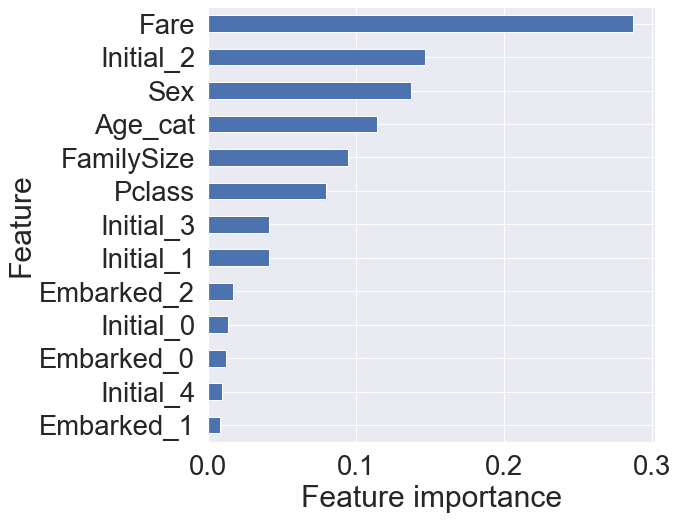

In [167]:
plt.figure(figsize=(8,8))
Series_feat_imp.sort_values(ascending=True).plot.barh()
plt.xlabel("Feature importance")
plt.ylabel("Feature")
plt.show()

In [173]:
submission = pd.read_csv("gender_submission.csv")
prediction = model.predict(X_test)
submission.shape

(418, 2)